<a href="https://colab.research.google.com/github/sagar431/LSTM-based-inshorts/blob/main/lstmishorts_applications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Content


- **Business Case Introduction - How inshorts delivers news in less than 60 words?**

   - ASSESSMENT
        - [Easy] [MSQ] [Text summarization Model Type](https://www.scaler.com/hire/test/problem/36971/)

- **Reading the dataset**
  - Word Distributions
  - Understanding problem statement
  - Long term dependancies: Vanishing and exploding gradients

- **How can we mitigate vanishing and exploding gradients problem?**

    - ASSESSMENT

        - [Easy] [MSQ] [Long term dependency in RNN](https://www.scaler.com/hire/test/problem/36978/)

        - [Medium] [MCQ] [Vanishing and exploding gradient](https://www.scaler.com/hire/test/problem/36982/)
        - [Easy] [MSQ] [Truncated BPTT vs Normal BPTT](https://www.scaler.com/hire/test/problem/37055/)

         - [Hard] [MSQ] [Gradient Clipping](https://www.scaler.com/hire/test/problem/37057/)

        - [Medium] [MSQ] [Clipping By value vs norm](https://www.scaler.com/hire/test/problem/37060/)
        - [Hard] [MSQ] [Weight Initialization](https://www.scaler.com/hire/test/problem/37064/)
        
        - [Easy] [MSQ] [Vanishing Gradient Problem](https://www.scaler.com/hire/test/problem/37067/)
        
        - [Easy] [MSQ] [Activation Function](https://www.scaler.com/hire/test/problem/37712/)



- **LSTM Architecture**
  - Input gate
  - Forget gate
  - Output gate
  - Backpropagation: mitigating vanishing and exploding gradients
  - ASSESSMENT
      - [Easy] [MSQ] [LSTM vs RNN](https://www.scaler.com/hire/test/problem/36975/)
      - [Medium] [MSQ] [LSTM Info](https://www.scaler.com/hire/test/problem/37068/)
    - [Medium] [MSQ] [LSTM Gates](https://www.scaler.com/hire/test/problem/37133/)
    
    - [Medium] [MSQ] [LSTM states](https://www.scaler.com/hire/test/problem/37137/)

    - [Medium] [MSQ] [LSTM architecture](https://www.scaler.com/hire/test/problem/37145/)
    - [Easy] [MSQ] [LSTM context retention](https://www.scaler.com/hire/test/problem/37139/)
    - [Medium] [MSQ] [Encoder Decoder Architecture Info](https://www.scaler.com/hire/test/problem/36972/)

    - [Hard] [MCQ] [LSTM Cell Memory Gate](https://www.scaler.com/hire/test/problem/37713/)

        


- **Variants of LSTM**
  - GRU
  - ASSESSMENT
      - [Medium] [MSQ] [GRU Architecture](https://www.scaler.com/hire/test/problem/37147/)

      - [Medium] [MSQ] [GRU vs LSTM](https://www.scaler.com/hire/test/problem/37168/)



- **Code**

- **Rouge Score**
    - ASSESSMENT
        - [Hard] [MSQ] [ROUGE score](https://www.scaler.com/hire/test/problem/37169/)

In [ ]:
# %%HTML
# <style>
# td {
#   font-size: 20px
# }
# </style>

In [ ]:
!pip install rouge-score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=8fcb4ea0db516c16a8d93f3ac47b9beebc48a824c446ad85b22e2e81f4e3d581
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [ ]:
import pandas as pd
import numpy as np
import spacy
from IPython.display import Image


import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# How inshorts delivers news in less than 60 words

* Inshorts is a news app started in 2013 which delivers news in less than 60 words.
* In this business use case we will look at how we can train a news summarisation model using Recurrent Neural Networks.
* This means that when we pass an input of M words, it outputs N words which is the summary of the News article where N<M.
* In this business case we will try to summarize news which are 40-60 words in less than 30 words.

In [ ]:
# Setup some configuration parameters

config = {'min_text_len':40,
          'max_text_len':60,
          'max_summary_len':30,
          'latent_dim' : 300,
          'embedding_dim' : 200}

---
# Reading the dataset
---

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!gdown 1sui9RXxVsPDa4s2kooQwRGhb8taZhcgD
!gdown 1H3gdo7SLBiWE_GGD6_xcdAp2wJJFcd5L

In [ ]:
from rouge_score import rouge_scorer

summary = pd.read_csv('news_summary.csv', encoding='iso-8859-1')
raw = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

raw = raw.rename(columns = {'headlines':'summary'})
summary = summary[['headlines', 'text']].rename(columns={'headlines':'summary'})

# Concatenate the summary and the raw files
df = pd.concat([raw, summary]).reset_index(drop=True)

summary.shape, raw.shape

### Distribution of words before filtering

In [ ]:
fig, ax =plt.subplots(1,2, figsize=(20,2.5))
sns.boxplot(raw.text.str.split().str.len(), ax=ax[0])
ax[0].set_title('text')
sns.boxplot(raw.summary.str.split().str.len(), ax=ax[1])
ax[1].set_title('summary')

fig.show()

### Filter text in the range between 40 and 60 words

In [ ]:
print(f'Before filtering: {raw.shape}')
pre = df.loc[((df['text'].str.split(" ").str.len()>config['min_text_len'])
               &(df['text'].str.split(" ").str.len()<config['max_text_len']))].reset_index(drop=True)
print(f'After filtering: {pre.shape}')

### Distribution of words after filtering

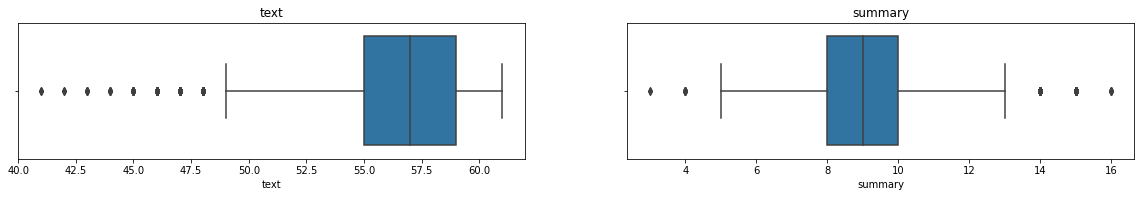

In [ ]:
fig, ax =plt.subplots(1,2, figsize=(20,2.5))
sns.boxplot(pre.text.str.split().str.len(), ax=ax[0])
ax[0].set_title('text')
sns.boxplot(pre.summary.str.split().str.len(), ax=ax[1])
ax[1].set_title('summary')

fig.show()

### Let's look at a sample

In [ ]:
ind = 1
print(f'Text: {pre.text[ind]}')
print()
print(f'Summary: {pre.summary[ind]}')
print()
print(f'Text length: {len(pre.text[ind].split())}')
print(f'Summary length: {len(pre.summary[ind].split())}')


Text: India recorded their lowest ODI total in New Zealand after getting all out for 92 runs in 30.5 overs in the fourth ODI at Hamilton on Thursday. Seven of India's batsmen were dismissed for single-digit scores, while their number ten batsman Yuzvendra Chahal top-scored with 18*(37). India's previous lowest ODI total in New Zealand was 108.

Summary: India get all out for 92, their lowest ODI total in New Zealand

Text length: 56
Summary length: 13


## What kind of problem is it?

* <b>Many to Many:</b> From the problem statement we can understand that it has multiple input and output, so it's a many to many problem.

## Which architecture works well for this?

* <b>Encoder Decoder:</b> Since the input and the output lengths are not the same we will use the Encoder Decoder architecture

## What is Long Term dependencies?

For the sake of understanding let's assume that we are performing a next word prediction task given the previous words.
<br>

<b>Sentence:</b>
I visited <font color='blue'><b>Paris</b></font> last year during winter as a part of the business trip. For the first 2 days I suferred from jet lag and stayed at hotel near my office location. The weather was too cold for someone from a subcontinent. The trip lasted for 2 weeks and I travelled by metro for the most of my commute as the city is well connected. They were quite a lot of market area for shopping to buy souvenirs too. During the weekend I even got a chance to see the <font color='blue'><b>Eiffel tower</b></font>.

In the above example to complete the last word <b>Eiffel tower</b>, the location <b>Paris</b> mentioned at the 3rd words in the sentence had to be retained to be able to make the right prediction. This is called long term dependencies


## What is the problem with it?

* <b>The bottle-neck at Final Encoder Hidden state</b>:
<br>
> As we can see from the architecture the entire inputs at the encoder has to be retained by the <b>final encoder hidden state</b>.
<br>
> This also means that the context of the words at the begining of the sentence would be retained compared to the words at the begining of the sentence
<br>
> Imagine if a input has sentences which could contain 100s or 1000s of words then retaining the context of the initial words is very difficult by the Vanilla RNNs

## Why they can't retain long term dependencies?
There are 2 reasons <b>1) Vanishing gradients, 2) Exploding gradients</b>


## But what is Vanishing and Exploding gradients ?

Before understanding Vanishing and Exploding gradients let's have a quick recap of  backpropagation in RNN and in this example we will consider W.

### Exploding gradients
* Exploding gradient is the revese of Vanishing gradients

* if the gradients with respect to <font size='4'> $ \frac {\partial \mathbf{h_t}}{\partial \mathbf{h_{t-1}}} > 1$ </font> then the final value of the product of 60 terms will result in a very huge number which the memory can't hold and it will result in <b>NaN</b> as the output

### But don't we have the same problem in normal Neural Networks when we go deeper?

Yes we do, but how is the normall NN different from RNN?
* In RNN the same weight matrices (U, V, W) are used through time.
* In normal NN each layer has different weight matrices and there is no weight sharing.
* Even if one of the weight matrix is randomly initialized with a smaller values or bigger values, it gets compensated by the other matrices that do not fall on the either extremes.
* These are the reasons that RNN suffers more from Vanishing & Exploding gradients compared to normal NN

---
# Can we overcome this?
---
#### Well, we cannot completely overcome vanishing and exploding gradients problem but yes there are ways to mitigate them

* Truncated Backpropagation through time
* Gradient clipping    
* Weight initialization
* Long Short-Term Memory Network(LSTM)

---
# A closer look at LSTM
---

### How LSTM overcomes the short term memory problem?

LSTMs are special type of RNN structures that contains 2 memory units compared to 1 in the Vanilla RNN.

<b>Cell state:</b>
<br>
It has a new state called the Cell state <font size='3.5'><b>C<sub>t</sub></b></font> which retains long term information

<b>Hidden state:</b>
<br>
The hidden state <font size='3.5'><b>h<sub>t</sub></b></font> is similar to the hidden state in Vanilla RNN which carries the short term memory

### How the information passing is controlled in LSTM?

Compared to Vanilla RNN, LSTMs have a special structures called <b>gates</b> which controls the flow of information in the cell, hidden state. The gates can be thought of as a literal gate that either stops or allows.

Types of gates
* Forget gate
* Input gate
* Output gate

## **How Forget, Input and Output Gate works?**

Let's understand it with an example sentence

<b>Sentence:</b>
I like to travel and I visited <font color='blue'><b>Paris</b></font> last year as a part of my business trip. It was winter season and too cold for someone from the sub-continent. I stayed at Hilton hotel and I was fortunate enough to get a room where from my window I could see the <font color='blue'><b>Eiffel tower</b></font>. I took my family on vaction to <font color='blue'><b>Cairo</b></font>, Egypt last month. They were quite a lot of market area for shopping to buy souvenirs and my kids enjoyed seeing the great <font color='blue'><b>pyramids</b></font> for the first time.  

<b>Summary:</b> I saw Eiffel tower when I was in Paris and during my vacation I visited the Pyramids in Cairo.

### Input gate

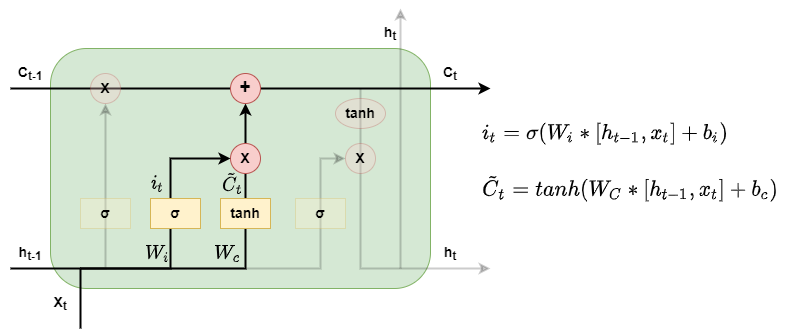

At first the weights are randomly initialized and the values of C<sub>t-1</sub> weight and h<sub>t-1</sub> are all 0.

* As we know each word is passed at each time step.
* When the word <font color='blue'><b>Paris</b></font> is passed to the LSTM cell,
    * A copy of the Input(embeddings of Paris) and hidden state are passed to <b>sigmoid</b> and <b>tanh</b> function which outputs <font size='4'><b>i<sub>t</sub></b></font> and <font size='4'><b>$\tilde C$<sub>t</sub></b></font> respectively.
    * As we know the output of sigmoid function <font size='4'><b>i<sub>t</sub></b></font> ranges from 0 to 1.
    * When the information has to be added to the cell state <font size='4'><b>C<sub>t</sub></b></font> then <font size='4'><b>i<sub>t</sub></b></font> will be close to 1.
    * <font size='4'><b>i<sub>t</sub> * $\tilde C_t \simeq \tilde C $</b></font>
    * Now the word <font color='blue'><b>Paris</b></font> will be added to the long term memory <font size='4'><b>C<sub>t</sub></b></font> at the <font size='4'><b>+</b></font> operation

    * The cell state <font size='4'><b>C<sub>t</sub></b></font> is updated with <b>Paris</b>.    
<br>

* When the subsequent words <font color='brown'><b>last, year .....</b></font> are passed
    * Similar sigmoid and tanh operations occur
    * But this time the sigmoid output <font size='4'><b>i<sub>t</sub></b></font> will be close to 0 since the info about the words <font color='brown'><b>last, year .....</b></font> need not be carried in long term memory
    * <font size='4'><b>i<sub>t</sub> * $\tilde C_t \simeq 0 $</b></font>
    * When the output of multiplication which is 0 is added to the cell state <font size='4'><b>$\tilde C$<sub>t</sub></b></font> the information about paris is still retained.
    
Note the difference between <font size='4'><b>C<sub>t</sub></b></font> and <font size='4'><b>$\tilde C$<sub>t</sub></b></font>

### Forget gate

### Output gate

---
# Code Implementation
---

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Embedding, Input, InputLayer, RNN, SimpleRNN, LSTM, Bidirectional, TimeDistributed
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

import string
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

from sklearn.model_selection import train_test_split

import spacy
from time import time
import numpy as np


# Text preprocessing

In [ ]:
import re

# Remove non-alphabetic characters (Data Cleaning)
def text_strip(sentence):

    sentence = re.sub("(\\t)", " ", str(sentence)).lower()
    sentence = re.sub("(\\r)", " ", str(sentence)).lower()
    sentence = re.sub("(\\n)", " ", str(sentence)).lower()

    # Remove - if it occurs more than one time consecutively
    sentence = re.sub("(--+)", " ", str(sentence)).lower()

    # Remove . if it occurs more than one time consecutively
    sentence = re.sub("(\.\.+)", " ", str(sentence)).lower()

    # Remove the characters - <>()|&©ø"',;?~*!
    sentence = re.sub(r"[<>()|&©ø\[\]\'\",;?~*!]", " ", str(sentence)).lower()

    # Remove \x9* in text
    sentence = re.sub(r"(\\x9\d)", " ", str(sentence)).lower()

    # Replace CM# and CHG# to CM_NUM
    sentence = re.sub("([cC][mM]\d+)|([cC][hH][gG]\d+)", "CM_NUM", str(sentence)).lower()

    # Remove punctuations at the end of a word
    sentence = re.sub("(\.\s+)", " ", str(sentence)).lower()
    sentence = re.sub("(\-\s+)", " ", str(sentence)).lower()
    sentence = re.sub("(\:\s+)", " ", str(sentence)).lower()

    # Remove multiple spaces
    sentence = re.sub("(\s+)", " ", str(sentence)).lower()

    return sentence

# Get the cleaned text and Add start, end tokens

In [ ]:
pre['cleaned_text'] = pre.text.apply(lambda x: text_strip(x))
pre['cleaned_summary'] = pre.summary.apply(lambda x: '_START_ '+ text_strip(x) + ' _END_')
pre['cleaned_summary'] = pre['cleaned_summary'].apply(lambda x: 'sostok ' + x + ' eostok')
pre

,summary,text,cleaned_text,cleaned_summary
0,Rahat Fateh Ali Khan denies getting notice for...,Pakistani singer Rahat Fateh Ali Khan has deni...,pakistani singer rahat fateh ali khan has deni...,sostok _START_ rahat fateh ali khan denies get...
1,"India get all out for 92, their lowest ODI tot...",India recorded their lowest ODI total in New Z...,india recorded their lowest odi total in new z...,sostok _START_ india get all out for 92 their ...
2,Called PM Modi 'sir' 10 times to satisfy his e...,Andhra Pradesh CM N Chandrababu Naidu has said...,andhra pradesh cm n chandrababu naidu has said...,sostok _START_ called pm modi sir 10 times to ...
3,81-yr-old woman conducts physical training in ...,"Isha Ghosh, an 81-year-old member of Bharat Sc...",isha ghosh an 81-year-old member of bharat sco...,sostok _START_ 81-yr-old woman conducts physic...
4,"Karan Johar, Tabu turn showstoppers on opening...",Filmmaker Karan Johar and actress Tabu turned ...,filmmaker karan johar and actress tabu turned ...,sostok _START_ karan johar tabu turn showstopp...
...,...,...,...,...
54567,Prosthetic fingers on sale to rig UP election:...,An investigation by India Today has unmasked a...,an investigation by india today has unmasked a...,sostok _START_ prosthetic fingers on sale to r...
54568,"Kangana, Shahid, Saif starrer 'Rangoon' hits t...","The Kangana Ranaut, Shahid Kapoor and Saif Ali...",the kangana ranaut shahid kapoor and saif ali ...,sostok _START_ kangana shahid saif starrer ran...
54569,Ticket collector bites off senior officer?s no...,A ticket collector on Thursday allegedly bit o...,a ticket collector on thursday allegedly bit o...,sostok _START_ ticket collector bites off seni...
54570,Shouldn't rob their childhood: Aamir on kids r...,"Aamir Khan, while talking about reality shows ...",aamir khan while talking about reality shows o...,sostok _START_ shouldn t rob their childhood a...


In [ ]:
print(pre.shape)
post_pre = pre[((pre.cleaned_text.str.split().str.len()<=config['max_text_len']) &
                (pre.summary.str.split().str.len()<=(config['max_summary_len']+4)))].copy()
post_pre = post_pre.reset_index(drop=True)
print(post_pre.shape)

post_pre = post_pre.drop(['text', 'summary'], axis=1)
post_pre = post_pre.rename(columns = {'cleaned_text':'text',
                                      'cleaned_summary':'summary'})
post_pre

(54572, 4)
(47500, 4)


,text,summary
0,pakistani singer rahat fateh ali khan has deni...,sostok _START_ rahat fateh ali khan denies get...
1,india recorded their lowest odi total in new z...,sostok _START_ india get all out for 92 their ...
2,andhra pradesh cm n chandrababu naidu has said...,sostok _START_ called pm modi sir 10 times to ...
3,isha ghosh an 81-year-old member of bharat sco...,sostok _START_ 81-yr-old woman conducts physic...
4,filmmaker karan johar and actress tabu turned ...,sostok _START_ karan johar tabu turn showstopp...
...,...,...
47495,indian captain virat kohli on friday got out w...,sostok _START_ virat kohli out for a duck for ...
47496,srinivas kunchubhotla 32 an indian engineer wa...,sostok _START_ indian shot dead in us over all...
47497,an investigation by india today has unmasked a...,sostok _START_ prosthetic fingers on sale to r...
47498,a ticket collector on thursday allegedly bit o...,sostok _START_ ticket collector bites off seni...


# Split the train and validation dataset

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(np.array(post_pre["text"]),
                                            np.array(post_pre["summary"]),
                                            test_size=0.1,
                                            random_state=0,
                                            shuffle=True
                                           )

x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((42750,), (4750,), (42750,), (4750,))

In [ ]:
def get_rare_words(text_col):

    # Prepare a tokenizer on testing data
    text_tokenizer = Tokenizer()
    text_tokenizer.fit_on_texts(list(text_col))

    thresh = 5

    cnt = 0
    tot_cnt = 0

    for key, value in text_tokenizer.word_counts.items():
        tot_cnt = tot_cnt + 1
        if value < thresh:
            cnt = cnt + 1

    print("% of rare words in vocabulary:",(cnt / tot_cnt) * 100)

    return cnt, tot_cnt

### Tokenize the train dataset

In [ ]:
x_train_cnt, x_train_tot_cnt = get_rare_words(text_col=x_train)

% of rare words in vocabulary: 64.22363847045192


In [ ]:
# Prepare a tokenizer, again -- by not considering the rare words
x_tokenizer = Tokenizer(num_words=x_train_tot_cnt - x_train_cnt)
# x_tokenizer = Tokenizer(num_words = x_train_tot_cnt)
x_tokenizer.fit_on_texts(list(x_train))

# Convert text sequences to integer sequences
x_tr_seq = x_tokenizer.texts_to_sequences(x_train)
x_val_seq = x_tokenizer.texts_to_sequences(x_valid)

# Pad zero upto maximum length
x_tr = pad_sequences(x_tr_seq,  maxlen=config['max_text_len'], padding='post')
x_val = pad_sequences(x_val_seq, maxlen=config['max_text_len'], padding='post')

# Size of vocabulary (+1 for padding token)
x_voc = x_tokenizer.num_words + 1

print("Size of vocabulary in X = {}".format(x_voc))

Size of vocabulary in X = 20996


### Tokenize the validation dataset

In [ ]:
y_train_cnt, y_train_tot_cnt = get_rare_words(text_col=y_train)

% of rare words in vocabulary: 66.49736426949863


In [ ]:
# Prepare a tokenizer, again -- by not considering the rare words
y_tokenizer = Tokenizer(num_words=y_train_tot_cnt - y_train_cnt)
# y_tokenizer = Tokenizer(num_words=y_train_tot_cnt)
y_tokenizer.fit_on_texts(list(y_train))

# Convert text sequences to integer sequences
y_tr_seq = y_tokenizer.texts_to_sequences(y_train)
y_val_seq = y_tokenizer.texts_to_sequences(y_valid)

# Pad zero upto maximum length
y_tr = pad_sequences(y_tr_seq, maxlen=config['max_summary_len'], padding='post')
y_val = pad_sequences(y_val_seq, maxlen=config['max_summary_len'], padding='post')

# Size of vocabulary (+1 for padding token)
y_voc = y_tokenizer.num_words + 1

print("Size of vocabulary in Y = {}".format(y_voc))

Size of vocabulary in Y = 8708


# Initialize the Encoder and Decoder architecture

In [ ]:
latent_dim = config['latent_dim']
embedding_dim = config['embedding_dim']
max_text_len = config['max_text_len']
max_summary_len = config['max_summary_len']

# Encoder
encoder_inputs = Input(shape=(max_text_len, ))

# Embedding layer
enc_emb = Embedding(x_voc, embedding_dim,
                    trainable=True)(encoder_inputs)

# Encoder LSTM 1
encoder_lstm1 = LSTM(latent_dim, return_sequences=True,
                     return_state=True, dropout=0.4,
                     recurrent_dropout=0.4)
(encoder_output1, state_h1, state_c1) = encoder_lstm1(enc_emb)

# Encoder LSTM 2
encoder_lstm2 = LSTM(latent_dim, return_sequences=True,
                     return_state=True, dropout=0.4,
                     recurrent_dropout=0.4)
(encoder_output2, state_h2, state_c2) = encoder_lstm2(encoder_output1)

# Encoder LSTM 3
encoder_lstm3 = LSTM(latent_dim, return_state=True,
                     return_sequences=True, dropout=0.4,
                     recurrent_dropout=0.4)
(encoder_outputs, state_h, state_c) = encoder_lstm3(encoder_output2)

# Set up the decoder, using encoder_states as the initial state
decoder_inputs = Input(shape=(None, ))

# Embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

# Decoder LSTM
decoder_lstm = LSTM(latent_dim, return_sequences=True,
                    return_state=True, dropout=0.4,
                    recurrent_dropout=0.2)
(decoder_outputs, decoder_fwd_state, decoder_back_state) = \
    decoder_lstm(dec_emb, initial_state=[state_h, state_c])

# Dense layer
decoder_dense = TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 60)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 60, 200)      4199200     ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 60, 300),    601200      ['embedding[0][0]']              
                                 (None, 300),                                                     
                                 (None, 300)]                                                     
                                                                                              

# Compile and train the model

In [ ]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_name = "./model.h5"

save_model = tf.keras.callbacks.ModelCheckpoint(filepath=model_name,
                                                save_weights_only=True,
                                                save_best_only=True,
                                                verbose=1)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [ ]:
history = model.fit(
    [x_tr, y_tr[:, :-1]],
    y_tr.reshape(y_tr.shape[0], y_tr.shape[1], 1)[:, 1:],
    epochs=500,
    callbacks=[es, save_model],
    batch_size=1024,
    validation_data=([x_val, y_val[:, :-1]],
                     y_val.reshape(y_val.shape[0], y_val.shape[1], 1)[:, 1:]),
    )

Epoch 1/500
42/42 [==============================] - ETA: 0s - loss: 4.5180 - accuracy: 0.5909
Epoch 1: val_loss improved from inf to 2.78202, saving model to ./model.h5
42/42 [==============================] - 71s 1s/step - loss: 4.5180 - accuracy: 0.5909 - val_loss: 2.7820 - val_accuracy: 0.6204
Epoch 2/500
42/42 [==============================] - ETA: 0s - loss: 2.7255 - accuracy: 0.6229
Epoch 2: val_loss improved from 2.78202 to 2.66276, saving model to ./model.h5
42/42 [==============================] - 68s 2s/step - loss: 2.7255 - accuracy: 0.6229 - val_loss: 2.6628 - val_accuracy: 0.6298
Epoch 3/500
42/42 [==============================] - ETA: 0s - loss: 2.7010 - accuracy: 0.6477
Epoch 3: val_loss improved from 2.66276 to 2.53363, saving model to ./model.h5
42/42 [==============================] - 60s 1s/step - loss: 2.7010 - accuracy: 0.6477 - val_loss: 2.5336 - val_accuracy: 0.6820
Epoch 4/500
42/42 [==============================] - ETA: 0s - loss: 2.5031 - accuracy: 0.6858


# Plot the train and validation loss

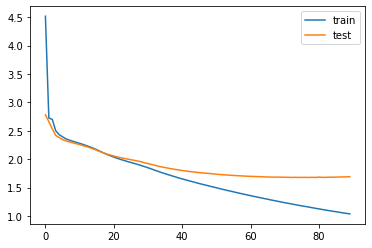

In [ ]:
from matplotlib import pyplot

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# Load the saved model

In [ ]:
model.load_weights('./model.h5')

# Reverse encode the index to their tokens

In [ ]:
reverse_source_word_index = x_tokenizer.index_word
reverse_target_word_index = y_tokenizer.index_word
target_word_index = y_tokenizer.word_index

# Create the Decoder inference architecture

In [ ]:
# Inference Models

# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs,
                      state_h, state_c])

# Decoder setup

# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim, ))
decoder_state_input_c = Input(shape=(latent_dim, ))
decoder_hidden_state_input = Input(shape=(max_text_len, latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2 = dec_emb_layer(decoder_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
(decoder_outputs2, state_h2, state_c2) = decoder_lstm(dec_emb2,
        initial_state=[decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2)

# Final decoder model
decoder_model = Model([decoder_inputs] + [decoder_hidden_state_input,
                      decoder_state_input_h, decoder_state_input_c],
                      [decoder_outputs2] + [state_h2, state_c2])

In [ ]:
def decode_sequence(input_seq):

    # Encode the input as state vectors.
    (e_out, e_h, e_c) = encoder_model.predict(input_seq, verbose=0)

    # Generate empty target sequence of length 1
    target_seq = np.zeros((1, 1))

    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''

    while not stop_condition:
        (output_tokens, h, c) = decoder_model.predict([target_seq]
                + [e_out, e_h, e_c], verbose=0)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]

        if sampled_token != 'eostok':
            decoded_sentence += ' ' + sampled_token

        # Exit condition: either hit max length or find the stop word.
        if sampled_token == 'eostok' or len(decoded_sentence.split()) \
            >= max_summary_len - 1:
            stop_condition = True

        # Update the target sequence (of length 1)
        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        (e_h, e_c) = (h, c)

    return decoded_sentence

In [ ]:
# To convert sequence to text
def seq2text(input_seq):
    newString = ''
    for i in input_seq:
        if i != 0:
            newString = newString + reverse_source_word_index[i] + ' '

    return newString

# To convert sequence to summary
def seq2summary(input_seq):
    newString = ''
    for i in input_seq:
        if (i != 0) and (i != target_word_index['sostok']) and (i != target_word_index['eostok']):
            newString = newString + reverse_target_word_index[i] + ' '

    return newString

# Prediction summary

In [ ]:
actual = []
predicted = []
for i in range(0, 50):
    print ('Review:', seq2text(x_tr[i]))

    actual.append(seq2summary(y_tr[i]))
    print ('Original summary:', actual[-1])

    predicted.append(decode_sequence(x_tr[i].reshape(1, config['max_text_len'])))
    print ('Predicted summary:', predicted[-1])
    print()

prediction_df = pd.DataFrame({'Actual':actual, 'Predicted':predicted})
prediction_df.head(10)

Review: actress deepika padukone has denied reports that she is portraying amrita pritam in an upcoming biopic on poet ludhianvi which is being produced by sanjay leela bhansali deepika has currently signed only vishal bhardwaj s next production where she will be the role of gangster khan who was popularly known as sapna didi 
Original summary: start deepika denies starring as amrita in bhansali s film end 
Predicted summary:  start deepika to play in biopic on padmavati row report end

Review: neelima azim while talking about being a single mother and sons shahid kapoor and ishaan khatter said i was a single mother and till today he shahid is taking care of ishaan and me in every way he took our lives forward in mumbai we started living better we had all the and comfort she added 
Original summary: start shahid takes care of ishaan me on being single mom end 
Predicted summary:  start my son taimur is a dream to be a on my burkha end

Review: an etihad airways pilot passed away on wed

,Actual,Predicted
0,start deepika denies starring as amrita in bha...,start deepika to play in biopic on padmavati ...
1,start shahid takes care of ishaan me on being ...,start my son taimur is a dream to be a on my ...
2,start pilot dies on board airways plane mid ai...,start pilot flyers to fly plane with emergenc...
3,start celebrations begin at ram nath kovind s ...,start pm modi to be called by a dictator in u...
4,start guest their heads in protest in mp end,start women wear skirts in protest against end
5,start can t tolerate weinstein like behaviour ...,start i don t know how to be used to stop fac...
6,start gujarat poll panel orders probe in contr...,start ec orders removal of using fake news on...
7,start facebook suspends canadian firm amid dat...,start facebook suspends facebook over fake ne...
8,start iraq s first non arab president passes a...,start iraq s 1st state citizen to be held in ...
9,start us scientists propose new organ in human...,start scientists propose new type of human sy...


---
# Rouge score
---
ROUGE score is a metric for evaluating the quality of summaries by comparing them with reference summaries using different types of word overlap measures. Some of the variants of ROUGE score are:

- ROUGE-N: measures the overlap of n-grams (sequences of n words) between the summaries.
- ROUGE-L: measures the longest matching sequence of words using longest common subsequence (LCS) algorithm.
- ROUGE-S: measures the order of any pair of words in a sentence, allowing for arbitrary gaps.

In [ ]:
r_score = []
rouge_pr = []
rouge_rc = []
rouge_f = []

scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)

for indx, data in prediction_df.iterrows():
    r_score = scorer.score(data.Actual, data.Predicted)
    pr = list(r_score['rouge1'])[0]
    rc = list(r_score['rouge1'])[1]
    fmeas = list(r_score['rouge1'])[2]

    rouge_pr.append(pr)
    rouge_rc.append(rc)
    rouge_f.append(fmeas)

prediction_df['rouge_pr'] = rouge_pr
prediction_df['rouge_rc'] = rouge_rc
prediction_df['rouge_f'] = rouge_f
prediction_df.head(10)

,Actual,Predicted,rouge_pr,rouge_rc,rouge_f
0,start deepika denies starring as amrita in bha...,start deepika to play in biopic on padmavati ...,0.363636,0.363636,0.363636
1,start shahid takes care of ishaan me on being ...,start my son taimur is a dream to be a on my ...,0.285714,0.333333,0.307692
2,start pilot dies on board airways plane mid ai...,start pilot flyers to fly plane with emergenc...,0.400000,0.400000,0.400000
3,start celebrations begin at ram nath kovind s ...,start pm modi to be called by a dictator in u...,0.166667,0.200000,0.181818
4,start guest their heads in protest in mp end,start women wear skirts in protest against end,0.500000,0.444444,0.470588
5,start can t tolerate weinstein like behaviour ...,start i don t know how to be used to stop fac...,0.266667,0.400000,0.320000
6,start gujarat poll panel orders probe in contr...,start ec orders removal of using fake news on...,0.250000,0.272727,0.260870
7,start facebook suspends canadian firm amid dat...,start facebook suspends facebook over fake ne...,0.600000,0.600000,0.600000
8,start iraq s first non arab president passes a...,start iraq s 1st state citizen to be held in ...,0.333333,0.400000,0.363636
9,start us scientists propose new organ in human...,start scientists propose new type of human sy...,0.666667,0.600000,0.631579


# Scope for improvement

As we can see that the predicted summary may not be perfectly good in terms of sentence formation, these are things we can try to improve it by
* Trying with different hyperparameters like Learning rate, different optimizers etc
* Stack more layers of LSTM or different architecture like GRU
* Trying some complex methods like adding attention layers or use transformer based architecure like Bert

## Conclusion summary

* LSTM, GRUs are modified version of RNNs
* They overcome the problem of Vanishing and Exploding gradients to some extent suffered by Vanilla RNN.
* They are able to do this because of a specail structures called gates which controls the flow of information.

https://colah.github.io/posts/2015-08-Understanding-LSTMs/
<br>
http://karpathy.github.io/2015/05/21/rnn-effectiveness/
<br>
https://towardsdatascience.com/what-is-gradient-clipping-b8e815cdfb48
<br>
https://towardsdatascience.com/the-exploding-and-vanishing-gradients-problem-in-time-series-6b87d558d22
<br>
https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21
<br>
https://weberna.github.io/blog/2017/11/15/LSTM-Vanishing-Gradients.html